Solcast JSON -> CSV

In [ ]:
import ast

def read_txt_as_dict(file_path):
    with open(file_path, 'r') as file:
        content = file.read()
        dictionary = ast.literal_eval(content)
        return dictionary

# Example usage
file_path = 'weatherforecast (1).txt'  # Replace with the path to your text file
data_dict = read_txt_as_dict(file_path)
print(data_dict)

{'forecasts': [{'ghi': 748, 'ghi90': 772, 'ghi10': 696, 'ebh': 424, 'dni': 482, 'dni10': 352, 'dni90': 545, 'dhi': 324, 'air_temp': 24, 'zenith': 28, 'azimuth': 175, 'cloud_opacity': 17, 'period_end': '2023-06-09T20:00:00.0000000Z', 'period': 'PT30M'}, {'ghi': 715, 'ghi90': 817, 'ghi10': 554, 'ebh': 366, 'dni': 420, 'dni10': 71, 'dni90': 692, 'dhi': 349, 'air_temp': 24, 'zenith': 29, 'azimuth': 161, 'cloud_opacity': 20, 'period_end': '2023-06-09T20:30:00.0000000Z', 'period': 'PT30M'}, {'ghi': 744, 'ghi90': 808, 'ghi10': 625, 'ebh': 457, 'dni': 535, 'dni10': 241, 'dni90': 719, 'dhi': 286, 'air_temp': 24, 'zenith': 31, 'azimuth': 148, 'cloud_opacity': 14, 'period_end': '2023-06-09T21:00:00.0000000Z', 'period': 'PT30M'}, {'ghi': 691, 'ghi90': 780, 'ghi10': 563, 'ebh': 381, 'dni': 461, 'dni10': 153, 'dni90': 721, 'dhi': 309, 'air_temp': 24, 'zenith': 34, 'azimuth': 136, 'cloud_opacity': 17, 'period_end': '2023-06-09T21:30:00.0000000Z', 'period': 'PT30M'}, {'ghi': 679, 'ghi90': 783, 'ghi10'

In [ ]:
import pandas as pd

def convert_dicts_to_dataframe(dict_list):
    data = []
    for dictionary in dict_list:
        ghi = dictionary.get('ghi')
        dni = dictionary.get('dni')
        dhi = dictionary.get('dhi')
        period_end = dictionary.get('period_end')
        data.append({'ghi': ghi, 'dni': dni, 'dhi': dhi, 'period_end': period_end})

    df = pd.DataFrame(data)
    df.set_index('period_end', inplace=True)
    return df

In [ ]:
data = convert_dicts_to_dataframe(data_dict['forecasts'])

In [ ]:
data.to_csv('solcast.csv', columns=['ghi', 'dni', 'dhi'])

# Forecast

* Python 3.5.2
* IPython 5.0.0
* pandas 0.18.0
* matplotlib 1.5.1
* netcdf4 1.6.4
* siphon 0.7.0

In [ ]:
!pip install netCDF4==1.6.4 --q
!pip install siphon==0.7 --q

In [ ]:
!pip install pvlib==0.9.1 --q

## Setup

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

# built in python modules
import datetime
import os

# python add-ons
import numpy as np
import pandas as pd

# for accessing UNIDATA THREDD servers
from siphon.catalog import TDSCatalog
from siphon.ncss import NCSS

import pvlib
from pvlib.forecast import GFS, HRRR_ESRL, NAM, NDFD, HRRR, RAP

In [ ]:
latitude = 51.087
longitude = -114.1293
tz = 'Canada/Mountain'

start = pd.Timestamp(datetime.datetime.now() + datetime.timedelta(hours=10), tz=tz) # today's date
end = start + pd.Timedelta(days=1)
print(start, end)

2023-06-10 05:47:33.613050-06:00 2023-06-11 05:47:33.613050-06:00


## NAM

In [ ]:
from pvlib.forecast import GFS, HRRR_ESRL, NAM, NDFD, HRRR, RAP

In [ ]:
# GFS model, defaults to 0.5 degree resolution
fm = NAM()

<ipython-input-120-8b40e7d7123f>:2: pvlibDeprecationWarning: The NAM class was deprecated in pvlib 0.9.1 and will be removed in a future release. For details, see https://pvlib-python.readthedocs.io/en/stable/user_guide/forecasts.html
  fm = NAM()


In [ ]:
# retrieve data
data = fm.get_data(latitude, longitude, start, end)

In [ ]:
data[sorted(data.columns)]

,Downward_Short-Wave_Radiation_Flux_surface,High_cloud_cover_high_cloud,Low_cloud_cover_low_cloud,Medium_cloud_cover_middle_cloud,Temperature_surface,Total_cloud_cover_entire_atmosphere_single_layer,Wind_speed_gust_surface
2023-06-10 06:00:00-06:00,7.000000,0.0,80.0,62.0,289.018463,81.0,4.900000
2023-06-10 07:00:00-06:00,12.000000,0.0,100.0,68.0,289.059662,100.0,6.504010
2023-06-10 08:00:00-06:00,96.000000,0.0,100.0,13.0,290.209656,100.0,6.943854
2023-06-10 09:00:00-06:00,100.000000,0.0,100.0,28.0,290.969666,100.0,7.022947
2023-06-10 10:00:00-06:00,385.690735,0.0,97.0,22.0,293.229675,97.0,6.810605
2023-06-10 11:00:00-06:00,722.535461,0.0,25.0,15.0,300.109680,26.0,6.387464
2023-06-10 12:00:00-06:00,820.931030,0.0,2.0,3.0,302.769653,3.0,6.420111
2023-06-10 13:00:00-06:00,898.002014,0.0,2.0,2.0,305.329681,2.0,6.608628
2023-06-10 14:00:00-06:00,884.263367,0.0,0.0,2.0,306.199677,2.0,6.622229
2023-06-10 15:00:00-06:00,821.316345,1.0,0.0,4.0,306.059662,4.0,6.514937


In [ ]:
data = fm.process_data(data)

In [ ]:
import pandas as pd
pd.set_option('display.max_rows', None)

In [ ]:
len(data)

24

In [ ]:
data[['ghi', 'dni', 'dhi']]

,ghi,dni,dhi
2023-06-10 06:00:00-06:00,8.635050,0.000000,8.635050
2023-06-10 07:00:00-06:00,48.498294,0.000000,48.498294
2023-06-10 08:00:00-06:00,104.064681,0.000000,104.064681
2023-06-10 09:00:00-06:00,160.799079,3.339879,159.090613
2023-06-10 10:00:00-06:00,224.789663,13.674660,215.980813
2023-06-10 11:00:00-06:00,608.439528,406.663993,301.956565
2023-06-10 12:00:00-06:00,805.657768,720.349199,205.956486
2023-06-10 13:00:00-06:00,859.110055,732.020713,218.304071
2023-06-10 14:00:00-06:00,863.574557,731.378991,220.421839
2023-06-10 15:00:00-06:00,813.226556,700.990640,221.465455


In [ ]:
data.to_csv('pvlib.csv', columns=['ghi', 'dni', 'dhi'])

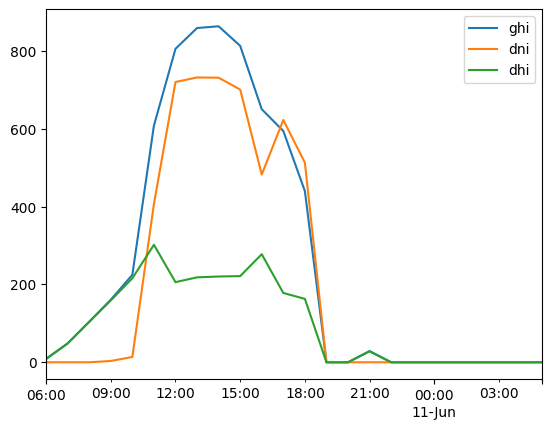

In [ ]:
data[['ghi', 'dni', 'dhi']].plot();

In [ ]:
cs = fm.location.get_clearsky(data.index)

In [ ]:
cs

,ghi,dni,dhi
2023-06-10 06:00:00-06:00,18.236643,93.940461,11.432100
2023-06-10 07:00:00-06:00,138.566557,429.190283,46.233339
2023-06-10 08:00:00-06:00,297.327665,626.212668,68.472162
2023-06-10 09:00:00-06:00,459.425947,733.834816,83.734076
2023-06-10 10:00:00-06:00,608.361772,796.482288,95.077101
2023-06-10 11:00:00-06:00,732.177557,834.029046,103.469904
2023-06-10 12:00:00-06:00,821.680553,855.756492,109.158066
2023-06-10 13:00:00-06:00,870.425598,866.128262,112.154879
2023-06-10 14:00:00-06:00,874.948903,867.045114,112.429835
2023-06-10 15:00:00-06:00,834.934882,858.669006,109.979289


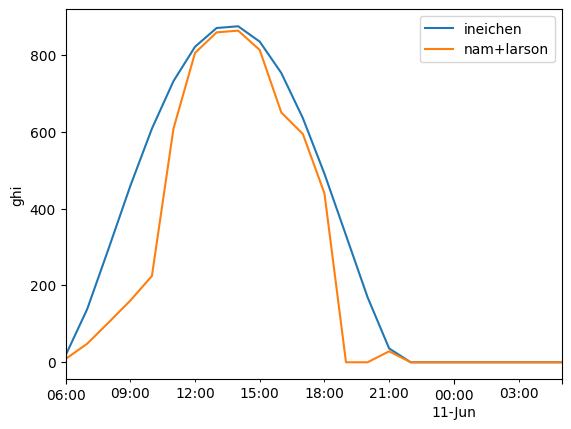

In [ ]:
fig, ax = plt.subplots()
cs['ghi'].plot(ax=ax, label='ineichen')
data['ghi'].plot(ax=ax, label='nam+larson')
ax.set_ylabel('ghi')
ax.legend();

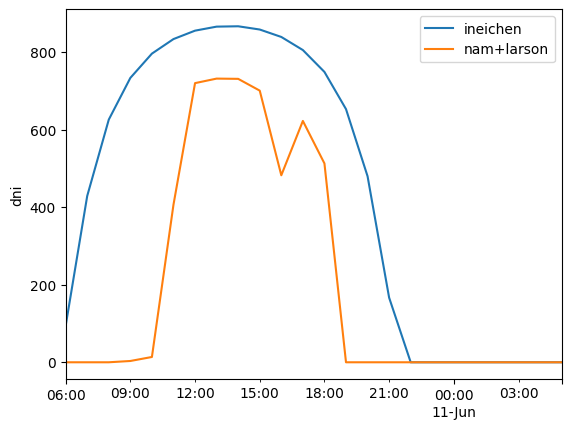

In [ ]:
fig, ax = plt.subplots()
cs['dni'].plot(ax=ax, label='ineichen')
data['dni'].plot(ax=ax, label='nam+larson')
ax.set_ylabel('dni')
ax.legend();

In [ ]:
# retrieve data
data = fm.get_processed_data(latitude, longitude, start, end)

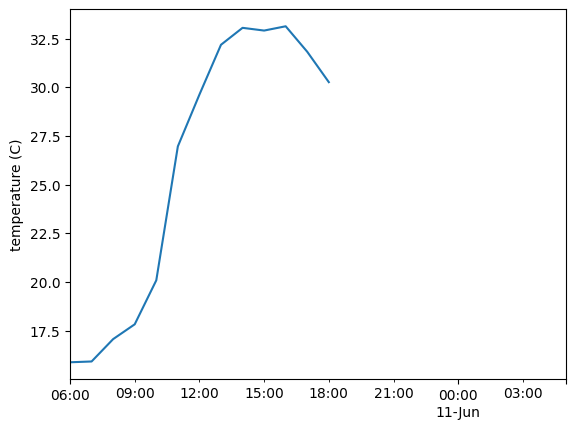

In [ ]:
data['temp_air'].plot()
plt.ylabel('temperature (%s)' % fm.units['temp_air']);

In [ ]:
cloud_vars = ['total_clouds', 'low_clouds', 'mid_clouds', 'high_clouds']

In [ ]:
total_cloud_cover = data['total_clouds']

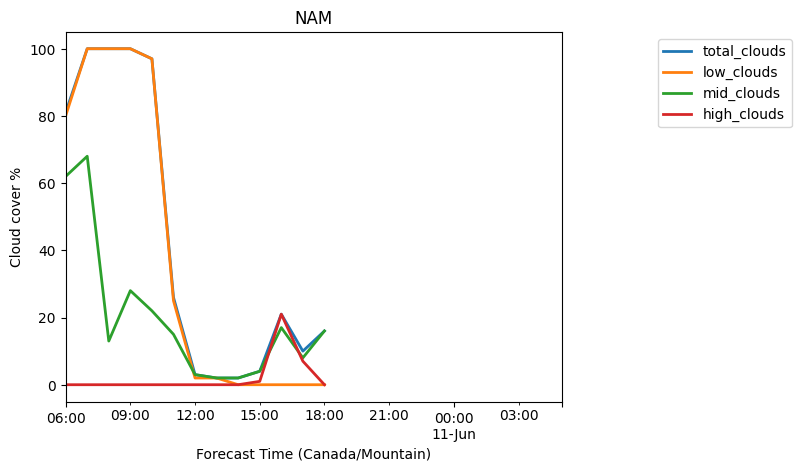

In [ ]:
for varname in cloud_vars:
    data[varname].plot(ls='-', linewidth=2)
plt.ylabel('Cloud cover' + ' %')
plt.xlabel('Forecast Time ('+str(data.index.tz)+')')
plt.title('NAM')
plt.legend(bbox_to_anchor=(1.18,1.0));

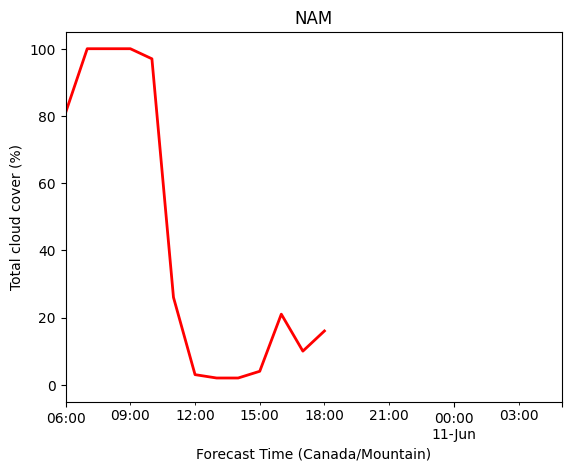

In [ ]:
total_cloud_cover.plot(color='r', linewidth=2)
plt.ylabel('Total cloud cover' + ' (%s)' % fm.units['total_clouds'])
plt.xlabel('Forecast Time ('+str(data.index.tz)+')')
plt.title('NAM');

## Quick power calculation

In [ ]:
from pvlib.pvsystem import PVSystem, retrieve_sam
from pvlib.modelchain import ModelChain

sandia_modules = retrieve_sam('SandiaMod')
sapm_inverters = retrieve_sam('cecinverter')
module = sandia_modules['Canadian_Solar_CS5P_220M___2009_']
inverter = sapm_inverters['ABB__MICRO_0_25_I_OUTD_US_208__208V_']

system = PVSystem(module_parameters=module,
                  inverter_parameters=inverter,
                  surface_tilt=latitude,
                  surface_azimuth=180)

# fx is a common abbreviation for forecast
fx_model = NAM()
fx_data = fx_model.get_processed_data(latitude, longitude, start, end)

# use a ModelChain object to calculate modeling intermediates
mc = ModelChain(system, fx_model.location)

# extract relevant data for model chain
mc.run_model(weather=fx_data)

<ipython-input-139-b52c2b4c9b9d>:15: pvlibDeprecationWarning: The NAM class was deprecated in pvlib 0.9.1 and will be removed in a future release. For details, see https://pvlib-python.readthedocs.io/en/stable/user_guide/forecasts.html
  fx_model = NAM()
/usr/local/lib/python3.10/dist-packages/pvlib/pvsystem.py:96: pvlibDeprecationWarning: The PVSystem.racking_model function was deprecated in pvlib 0.9 and will be removed in 0.10. Use PVSystem.arrays[i].racking_model instead.
  return wrapped(self, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/pvlib/pvsystem.py:96: pvlibDeprecationWarning: The PVSystem.module_type function was deprecated in pvlib 0.9 and will be removed in 0.10. Use PVSystem.arrays[i].module_type instead.
  return wrapped(self, *args, **kwargs)


KeyError: ignored

In [ ]:
mc.total_irrad.plot();

In [ ]:
mc.cell_temperature.plot();

In [ ]:
mc.ac.plot();